# a)

In [1]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('cancer.csv',delimiter='\t',  escapechar='\\')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 385 non-null    int64  
 1   weight                  375 non-null    float64
 2   height                  129 non-null    float64
 3   salads_per_week         375 non-null    float64
 4   veggies_fruits_per_day  374 non-null    float64
 5   healthy_diet            375 non-null    object 
 6   aerobic_per_week        381 non-null    float64
 7   sports_per_week         381 non-null    float64
 8   current_smoking         377 non-null    object 
 9   survey.month            385 non-null    float64
 10  prob_cancer             374 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 33.2+ KB


In [2]:
df

,user_id,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,prob_cancer
0,55,140.0,69.0,0.0,NaN,Below average,2.0,0.0,Never,2008.09,0.066120
1,36,150.0,67.0,2.0,1.0,Below average,3.0,3.0,Never,2008.09,0.366939
2,39,105.0,66.0,0.0,2.0,Average,1.0,0.0,Never,2008.09,0.805540
3,37,220.0,77.0,2.0,5.0,Very healthy,5.0,5.0,Never,2008.09,0.537907
4,72,135.0,62.0,0.0,1.0,Unhealthy,0.0,0.0,Never,2008.09,0.098464
...,...,...,...,...,...,...,...,...,...,...,...
380,48,220.0,77.0,1.0,2.0,Healthy,3.0,3.0,Never,2009.06,0.607081
381,24,NaN,63.0,1.0,2.0,Healthy,1.0,0.0,Never,2009.06,0.844723
382,66,160.0,70.0,0.0,2.0,Average,2.0,1.0,Never,2009.06,0.425409
383,65,140.0,66.0,4.0,2.0,Healthy,2.0,0.0,Never,2009.06,0.011917


In [3]:
df.isnull().sum()

user_id                     0
weight                     10
height                    256
salads_per_week            10
veggies_fruits_per_day     11
healthy_diet               10
aerobic_per_week            4
sports_per_week             4
current_smoking             8
survey.month                0
prob_cancer                11
dtype: int64

In [4]:
df['prob_cancer'].describe()

count    374.000000
mean       0.490485
std        0.288816
min        0.004486
25%        0.236591
50%        0.473122
75%        0.725315
max        0.998722
Name: prob_cancer, dtype: float64

نمایش توزیع داده ها prob_cancer

(0.0, 50.0)

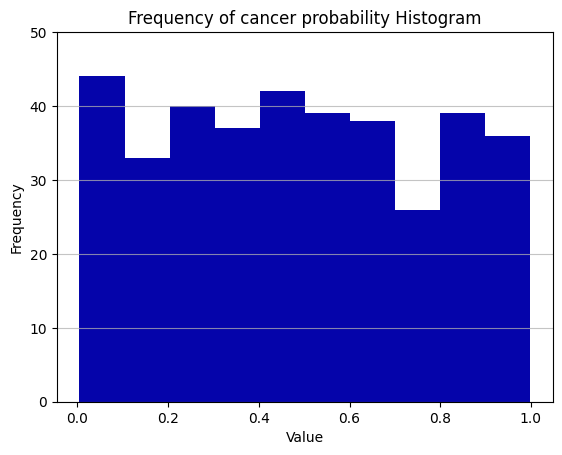

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df['prob_cancer'], bins='auto', color='#0504aa'
                            )
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of cancer probability Histogram')

maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
df_imputed = imp.fit_transform(df[['prob_cancer']])
df[['prob_cancer']] = df_imputed

bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]
df["category_cancer"] = pd.cut(df["prob_cancer"], bins=bins, labels=labels)

df.drop(['prob_cancer'], axis=1, inplace=True)
# Print the first 5 rows of the modified dataframe
df.head()

,user_id,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,category_cancer
0,55,140.0,69.0,0.0,NaN,Below average,2.0,0.0,Never,2008.09,Very Low
1,36,150.0,67.0,2.0,1.0,Below average,3.0,3.0,Never,2008.09,Low
2,39,105.0,66.0,0.0,2.0,Average,1.0,0.0,Never,2008.09,Very High
3,37,220.0,77.0,2.0,5.0,Very healthy,5.0,5.0,Never,2008.09,Moderate
4,72,135.0,62.0,0.0,1.0,Unhealthy,0.0,0.0,Never,2008.09,Very Low


# b)

<p dir="rtl"> یکی از مشکلات ستون 'height' این است که شامل تعداد زیادی null است، همانطور که قبلا دیدیم که می تواند استفاده موثر از این ستون را دشوار کند. مسئله دیگر این است که مقادیر null در ستون "height" را نمی توان به راحتی با استفاده از یک استراتژی ساده مانند میانه و میانگین نسبت داد.
یکی از راه‌حل‌های ممکن برای این مشکل این است که با استفاده از ستون‌های دیگر در مجموعه داده‌ها که ممکن است با ارتفاع مرتبط باشند، به عنوان مثال، وزن اغلب با قد همبستگی زیادی دارد و ما می توانیم با استفاده از رگرسیون خطی از این رابطه برای تخمین مقادیر قد از دست رفته استفاده کنیم. 
 <p/>

In [7]:
from sklearn.linear_model import LinearRegression

df.dropna(subset=['weight'], inplace=True)

missing_height = df['height'].isnull()
model = LinearRegression()
model.fit(df.loc[~missing_height, ['weight']], df.loc[~missing_height, 'height'])
df.loc[missing_height, 'height'] = model.predict(df.loc[missing_height, ['weight']])

#df['height'].fillna(df["height"].mean(), inplace=True)

In [8]:
df['height'].isnull().sum()
df['height']

0      69.0
1      67.0
2      66.0
3      77.0
4      62.0
       ... 
379    75.0
380    77.0
382    70.0
383    66.0
384    71.0
Name: height, Length: 375, dtype: float64

# c)

In [9]:
 df['current_smoking'].value_counts()

Never              355
Once in a while     10
0                    1
5                    1
2                    1
Some days            1
Name: current_smoking, dtype: int64

<p dir="rtl"> با توجه به مقادیر بالا به نظر میرسد current_smoking داده توصیف پذیر است و مقادیر ۰و۵و۲ پرت هستند و باید پاک شوند<p/>

In [10]:
df.drop(df.index[df['current_smoking'] == "0"], inplace = True)
df.drop(df.index[df['current_smoking'] == "5"], inplace = True)
df.drop(df.index[df['current_smoking'] == "2"], inplace = True)
df.dropna(subset=['current_smoking'], inplace=True)

df.isnull().sum()

user_id                   0
weight                    0
height                    0
salads_per_week           7
veggies_fruits_per_day    8
healthy_diet              6
aerobic_per_week          1
sports_per_week           1
current_smoking           0
survey.month              0
category_cancer           0
dtype: int64

In [11]:
 df['current_smoking'].value_counts()

Never              355
Once in a while     10
Some days            1
Name: current_smoking, dtype: int64

# d)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 384
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 366 non-null    int64   
 1   weight                  366 non-null    float64 
 2   height                  366 non-null    float64 
 3   salads_per_week         359 non-null    float64 
 4   veggies_fruits_per_day  358 non-null    float64 
 5   healthy_diet            360 non-null    object  
 6   aerobic_per_week        365 non-null    float64 
 7   sports_per_week         365 non-null    float64 
 8   current_smoking         366 non-null    object  
 9   survey.month            366 non-null    float64 
 10  category_cancer         366 non-null    category
dtypes: category(1), float64(7), int64(1), object(2)
memory usage: 32.0+ KB


In [13]:
df["healthy_diet"].value_counts()

Average           138
Below average      84
Healthy            78
Unhealthy          47
Very healthy        8
Very unhealthy      5
Name: healthy_diet, dtype: int64

In [14]:
df.isnull().sum()

user_id                   0
weight                    0
height                    0
salads_per_week           7
veggies_fruits_per_day    8
healthy_diet              6
aerobic_per_week          1
sports_per_week           1
current_smoking           0
survey.month              0
category_cancer           0
dtype: int64

In [15]:
df.healthy_diet = df.healthy_diet.map({"Average":0,"Below average":1,"Healthy":2,"Unhealthy":3,"Very healthy":4,"Very unhealthy":5})
df.current_smoking = df.current_smoking.map({"Never":0,"Once in a while":1,"Some days":2})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 384
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 366 non-null    int64   
 1   weight                  366 non-null    float64 
 2   height                  366 non-null    float64 
 3   salads_per_week         359 non-null    float64 
 4   veggies_fruits_per_day  358 non-null    float64 
 5   healthy_diet            360 non-null    float64 
 6   aerobic_per_week        365 non-null    float64 
 7   sports_per_week         365 non-null    float64 
 8   current_smoking         366 non-null    int64   
 9   survey.month            366 non-null    float64 
 10  category_cancer         366 non-null    category
dtypes: category(1), float64(8), int64(2)
memory usage: 32.0 KB


In [17]:
df.fillna(df.mean(), inplace=True)

/tmp/ipykernel_4013/820435583.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [18]:
df.isnull().sum()

user_id                   0
weight                    0
height                    0
salads_per_week           0
veggies_fruits_per_day    0
healthy_diet              0
aerobic_per_week          0
sports_per_week           0
current_smoking           0
survey.month              0
category_cancer           0
dtype: int64

# e)

In [19]:
df.corr()

/tmp/ipykernel_4013/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,user_id,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month
user_id,1.000000,-0.101456,0.077053,0.076154,0.097013,-0.101469,0.125089,0.059532,0.027432,0.082460
weight,-0.101456,1.000000,-0.967561,-0.031424,-0.058776,0.086285,-0.067283,0.011328,0.013571,0.016308
height,0.077053,-0.967561,1.000000,0.017988,0.028426,-0.070277,0.036781,-0.015779,-0.007244,-0.004128
salads_per_week,0.076154,-0.031424,0.017988,1.000000,0.399778,0.009360,0.357290,0.245626,0.008367,0.054644
veggies_fruits_per_day,0.097013,-0.058776,0.028426,0.399778,1.000000,0.129826,0.313983,0.256923,-0.056466,0.011626
healthy_diet,-0.101469,0.086285,-0.070277,0.009360,0.129826,1.000000,0.031016,0.045415,-0.016152,-0.011583
aerobic_per_week,0.125089,-0.067283,0.036781,0.357290,0.313983,0.031016,1.000000,0.545922,-0.095130,-0.020006
sports_per_week,0.059532,0.011328,-0.015779,0.245626,0.256923,0.045415,0.545922,1.000000,-0.076931,-0.060054
current_smoking,0.027432,0.013571,-0.007244,0.008367,-0.056466,-0.016152,-0.095130,-0.076931,1.000000,-0.049190
survey.month,0.082460,0.016308,-0.004128,0.054644,0.011626,-0.011583,-0.020006,-0.060054,-0.049190,1.000000


In [20]:
df.drop(['user_id', 'survey.month'], axis=1, inplace=True)

In [21]:
df.category_cancer = df.category_cancer.map({"Very Low":0,"Low":1,"Moderate":2,"High":3,"Very High":4})

In [22]:
df["category_cancer"] = df["category_cancer"].astype("int")

In [23]:
df

,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,category_cancer
0,140.0,69.0,0.0,2.148045,1.0,2.0,0.0,0,0
1,150.0,67.0,2.0,1.000000,1.0,3.0,3.0,0,1
2,105.0,66.0,0.0,2.000000,0.0,1.0,0.0,0,4
3,220.0,77.0,2.0,5.000000,4.0,5.0,5.0,0,2
4,135.0,62.0,0.0,1.000000,3.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
379,265.0,75.0,0.0,1.000000,3.0,1.0,0.0,0,1
380,220.0,77.0,1.0,2.000000,2.0,3.0,3.0,0,3
382,160.0,70.0,0.0,2.000000,0.0,2.0,1.0,0,2
383,140.0,66.0,4.0,2.000000,2.0,2.0,0.0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weight                  366 non-null    float64
 1   height                  366 non-null    float64
 2   salads_per_week         366 non-null    float64
 3   veggies_fruits_per_day  366 non-null    float64
 4   healthy_diet            366 non-null    float64
 5   aerobic_per_week        366 non-null    float64
 6   sports_per_week         366 non-null    float64
 7   current_smoking         366 non-null    int64  
 8   category_cancer         366 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 28.6 KB


# f)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#elbow 
# try number
# label_encoder = LabelEncoder()

# df['category_cancer'] = label_encoder.fit_transform(df['category_cancer'])
X = df.drop('category_cancer', axis=1)
Y = df['category_cancer']


scaler = StandardScaler()
X= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
print(f' train: {X_train.shape}')
print(f' test: {X_test.shape}')

 train: (256, 8)
 test: (110, 8)


# g)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, r2_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# h)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_mat)

r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Accuracy: 0.20909090909090908
Confusion matrix:
[[ 7  6  7  0  3]
 [12  6  5  1  3]
 [ 4  6  6  1  1]
 [ 6  5  5  1  1]
 [ 9  6  5  1  3]]
R2 score: -0.9608303037410582


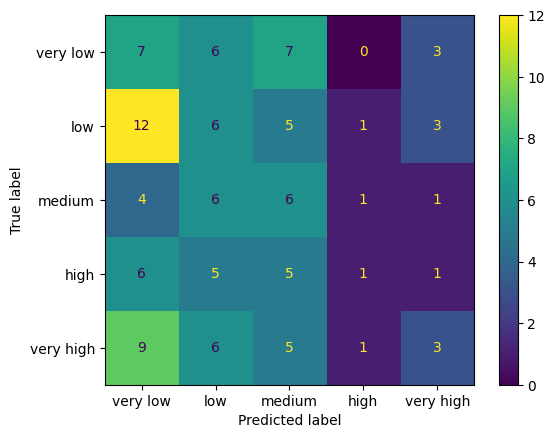

In [28]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["very low","low","medium","high","very high"])

cm_display.plot()
plt.show() 

# i)

In [29]:
data = pd.read_csv('cancer.csv',delimiter='\t',  escapechar='\\')
data

,user_id,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,prob_cancer
0,55,140.0,69.0,0.0,NaN,Below average,2.0,0.0,Never,2008.09,0.066120
1,36,150.0,67.0,2.0,1.0,Below average,3.0,3.0,Never,2008.09,0.366939
2,39,105.0,66.0,0.0,2.0,Average,1.0,0.0,Never,2008.09,0.805540
3,37,220.0,77.0,2.0,5.0,Very healthy,5.0,5.0,Never,2008.09,0.537907
4,72,135.0,62.0,0.0,1.0,Unhealthy,0.0,0.0,Never,2008.09,0.098464
...,...,...,...,...,...,...,...,...,...,...,...
380,48,220.0,77.0,1.0,2.0,Healthy,3.0,3.0,Never,2009.06,0.607081
381,24,NaN,63.0,1.0,2.0,Healthy,1.0,0.0,Never,2009.06,0.844723
382,66,160.0,70.0,0.0,2.0,Average,2.0,1.0,Never,2009.06,0.425409
383,65,140.0,66.0,4.0,2.0,Healthy,2.0,0.0,Never,2009.06,0.011917


In [30]:
data.isnull().sum()

user_id                     0
weight                     10
height                    256
salads_per_week            10
veggies_fruits_per_day     11
healthy_diet               10
aerobic_per_week            4
sports_per_week             4
current_smoking             8
survey.month                0
prob_cancer                11
dtype: int64

In [31]:
data.dropna(subset=['prob_cancer'], inplace=True)
data['category_cancer'] = pd.cut(data['prob_cancer'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[0, 1, 2, 3, 4])

In [32]:
data.corr()

/tmp/ipykernel_4013/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,user_id,weight,height,salads_per_week,veggies_fruits_per_day,aerobic_per_week,sports_per_week,survey.month,prob_cancer
user_id,1.000000,-0.103491,0.052961,0.068824,0.065524,0.132443,0.056076,0.080993,-0.043089
weight,-0.103491,1.000000,-0.512923,-0.093282,-0.051560,-0.054331,0.006457,0.045332,0.024428
height,0.052961,-0.512923,1.000000,0.636715,-0.136558,-0.176113,0.035701,-0.137369,-0.087013
salads_per_week,0.068824,-0.093282,0.636715,1.000000,0.352984,0.289242,0.237206,0.007269,0.029098
veggies_fruits_per_day,0.065524,-0.051560,-0.136558,0.352984,1.000000,0.314256,0.260647,0.014453,0.011475
aerobic_per_week,0.132443,-0.054331,-0.176113,0.289242,0.314256,1.000000,0.540280,0.007011,0.064919
sports_per_week,0.056076,0.006457,0.035701,0.237206,0.260647,0.540280,1.000000,-0.058724,0.048052
survey.month,0.080993,0.045332,-0.137369,0.007269,0.014453,0.007011,-0.058724,1.000000,0.028030
prob_cancer,-0.043089,0.024428,-0.087013,0.029098,0.011475,0.064919,0.048052,0.028030,1.000000


In [33]:
data = data.drop(["user_id","survey.month"], axis=1)

data['height'].fillna(data["height"].mean(), inplace=True)
data.healthy_diet = data.healthy_diet.map({"Average":0,"Below average":1,"Healthy":2,"Unhealthy":3,"Very healthy":4,"Very unhealthy":5})
data.current_smoking = data.current_smoking.map({"Never":0,"Once in a while":1,"Some days":2})

data.isnull().sum()

weight                     9
height                     0
salads_per_week            9
veggies_fruits_per_day    10
healthy_diet               9
aerobic_per_week           3
sports_per_week            3
current_smoking           10
prob_cancer                0
category_cancer            0
dtype: int64

In [34]:
data.fillna(data.mean(), inplace=True)

/tmp/ipykernel_4013/1474580016.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [38]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop('category_cancer', axis=1)
y = data['category_cancer']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, r2_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_mat)

r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Accuracy: 0.7699115044247787
Confusion matrix:
[[23  5  0  0  0]
 [ 7 15  2  0  0]
 [ 0  4 19  0  0]
 [ 0  0  2 12  3]
 [ 0  0  0  3 18]]
R2 score: 0.8884586180713743
